In [3]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [64]:
f = r.TFile("./data/gm2offline_ana.root")
f.cd("farline/calo1")
f.ls()

TFile**		./data/gm2offline_ana.root	
 TFile*		./data/gm2offline_ana.root	
  TDirectoryFile*		farline	farline (ReconEastPositionInFill) folder
   TDirectoryFile*		calo1	calo1
    KEY: TH1D	wiggle;1	calo 1 T Method
    KEY: TH3I	xHitPositionsVsTimeVsEnergy;1	calo 1 n xtal hits
    KEY: TH3I	yHitPositionsVsTimeVsEnergy;1	calo 1 n xtal hits
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirecto

In [65]:
h = f.Get("farline/calo1/xHitPositionsVsTimeVsEnergy").Clone("h")

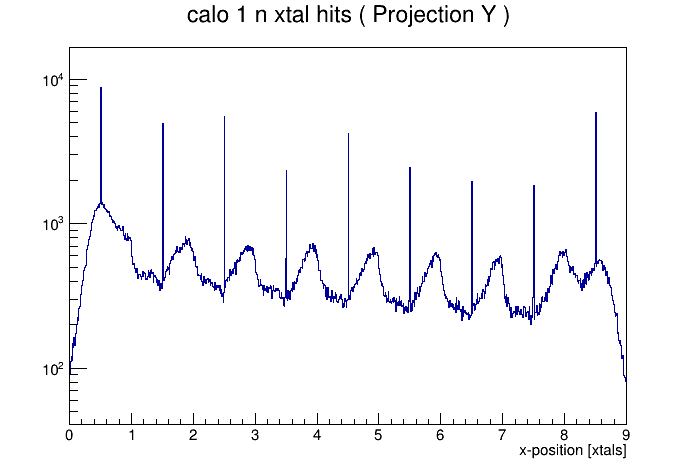

In [66]:
c = r.TCanvas()
h.ProjectionY().Draw()
c.SetLogy()
c.Draw()

---

In [67]:
t = f.Get("farline/eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :     3111 : Total =       370299950 bytes  File  Size =  302389177 *
*        :          : Tree compression factor =   1.22                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :     3111 : Total  Size=      13831 bytes  File Size  =       1222 *
*Baskets :       11 : Basket Size=      41654 bytes  Compression=  10.89     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :     3111 : Total  Size=      13876 bytes  File Size  =       1448 *
*Baskets :       11 : Basket Size=      41654 bytes  Compression=   9.21     *
*...................................................

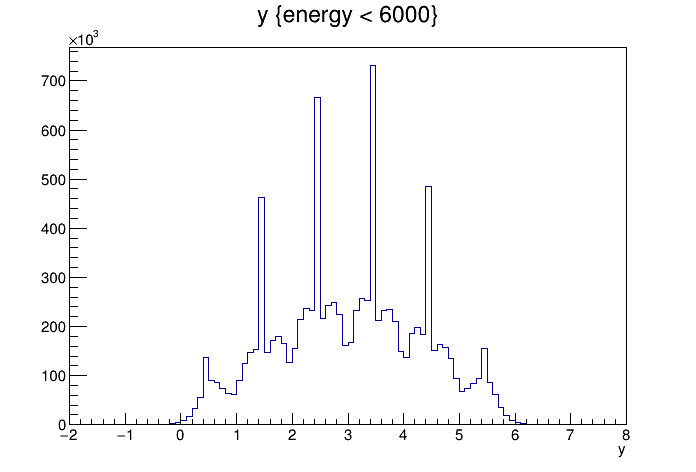

In [68]:
c = r.TCanvas()
t.Draw("y","energy < 6000")
c.Draw()

In [69]:
reconEastEnergyConstants = [1628.9,1505.9,1559.4,1564.9,1368.3,1516.9,1543.8,1533.0,1518.1,1551.7,1582.6,1610.8,1604.2,1566.5,
                            1528.0,1487.0,1520.0,1588.2,1554.9,1525.5,1455.7,1474.9,1522.5,1548.1]
reconEastEnergyConstantsErrors = [0.1,0.4,0.7,0.8,0.1,0.5,0.4,0.1,0.1,0.4,0.3,0.9,0.6,0.8,0.5,0.5,0.4,0.1,0.5,0.1,0.4,0.5,0.1,0.5]

In [72]:
t.SetFillColorAlpha(38,0.2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


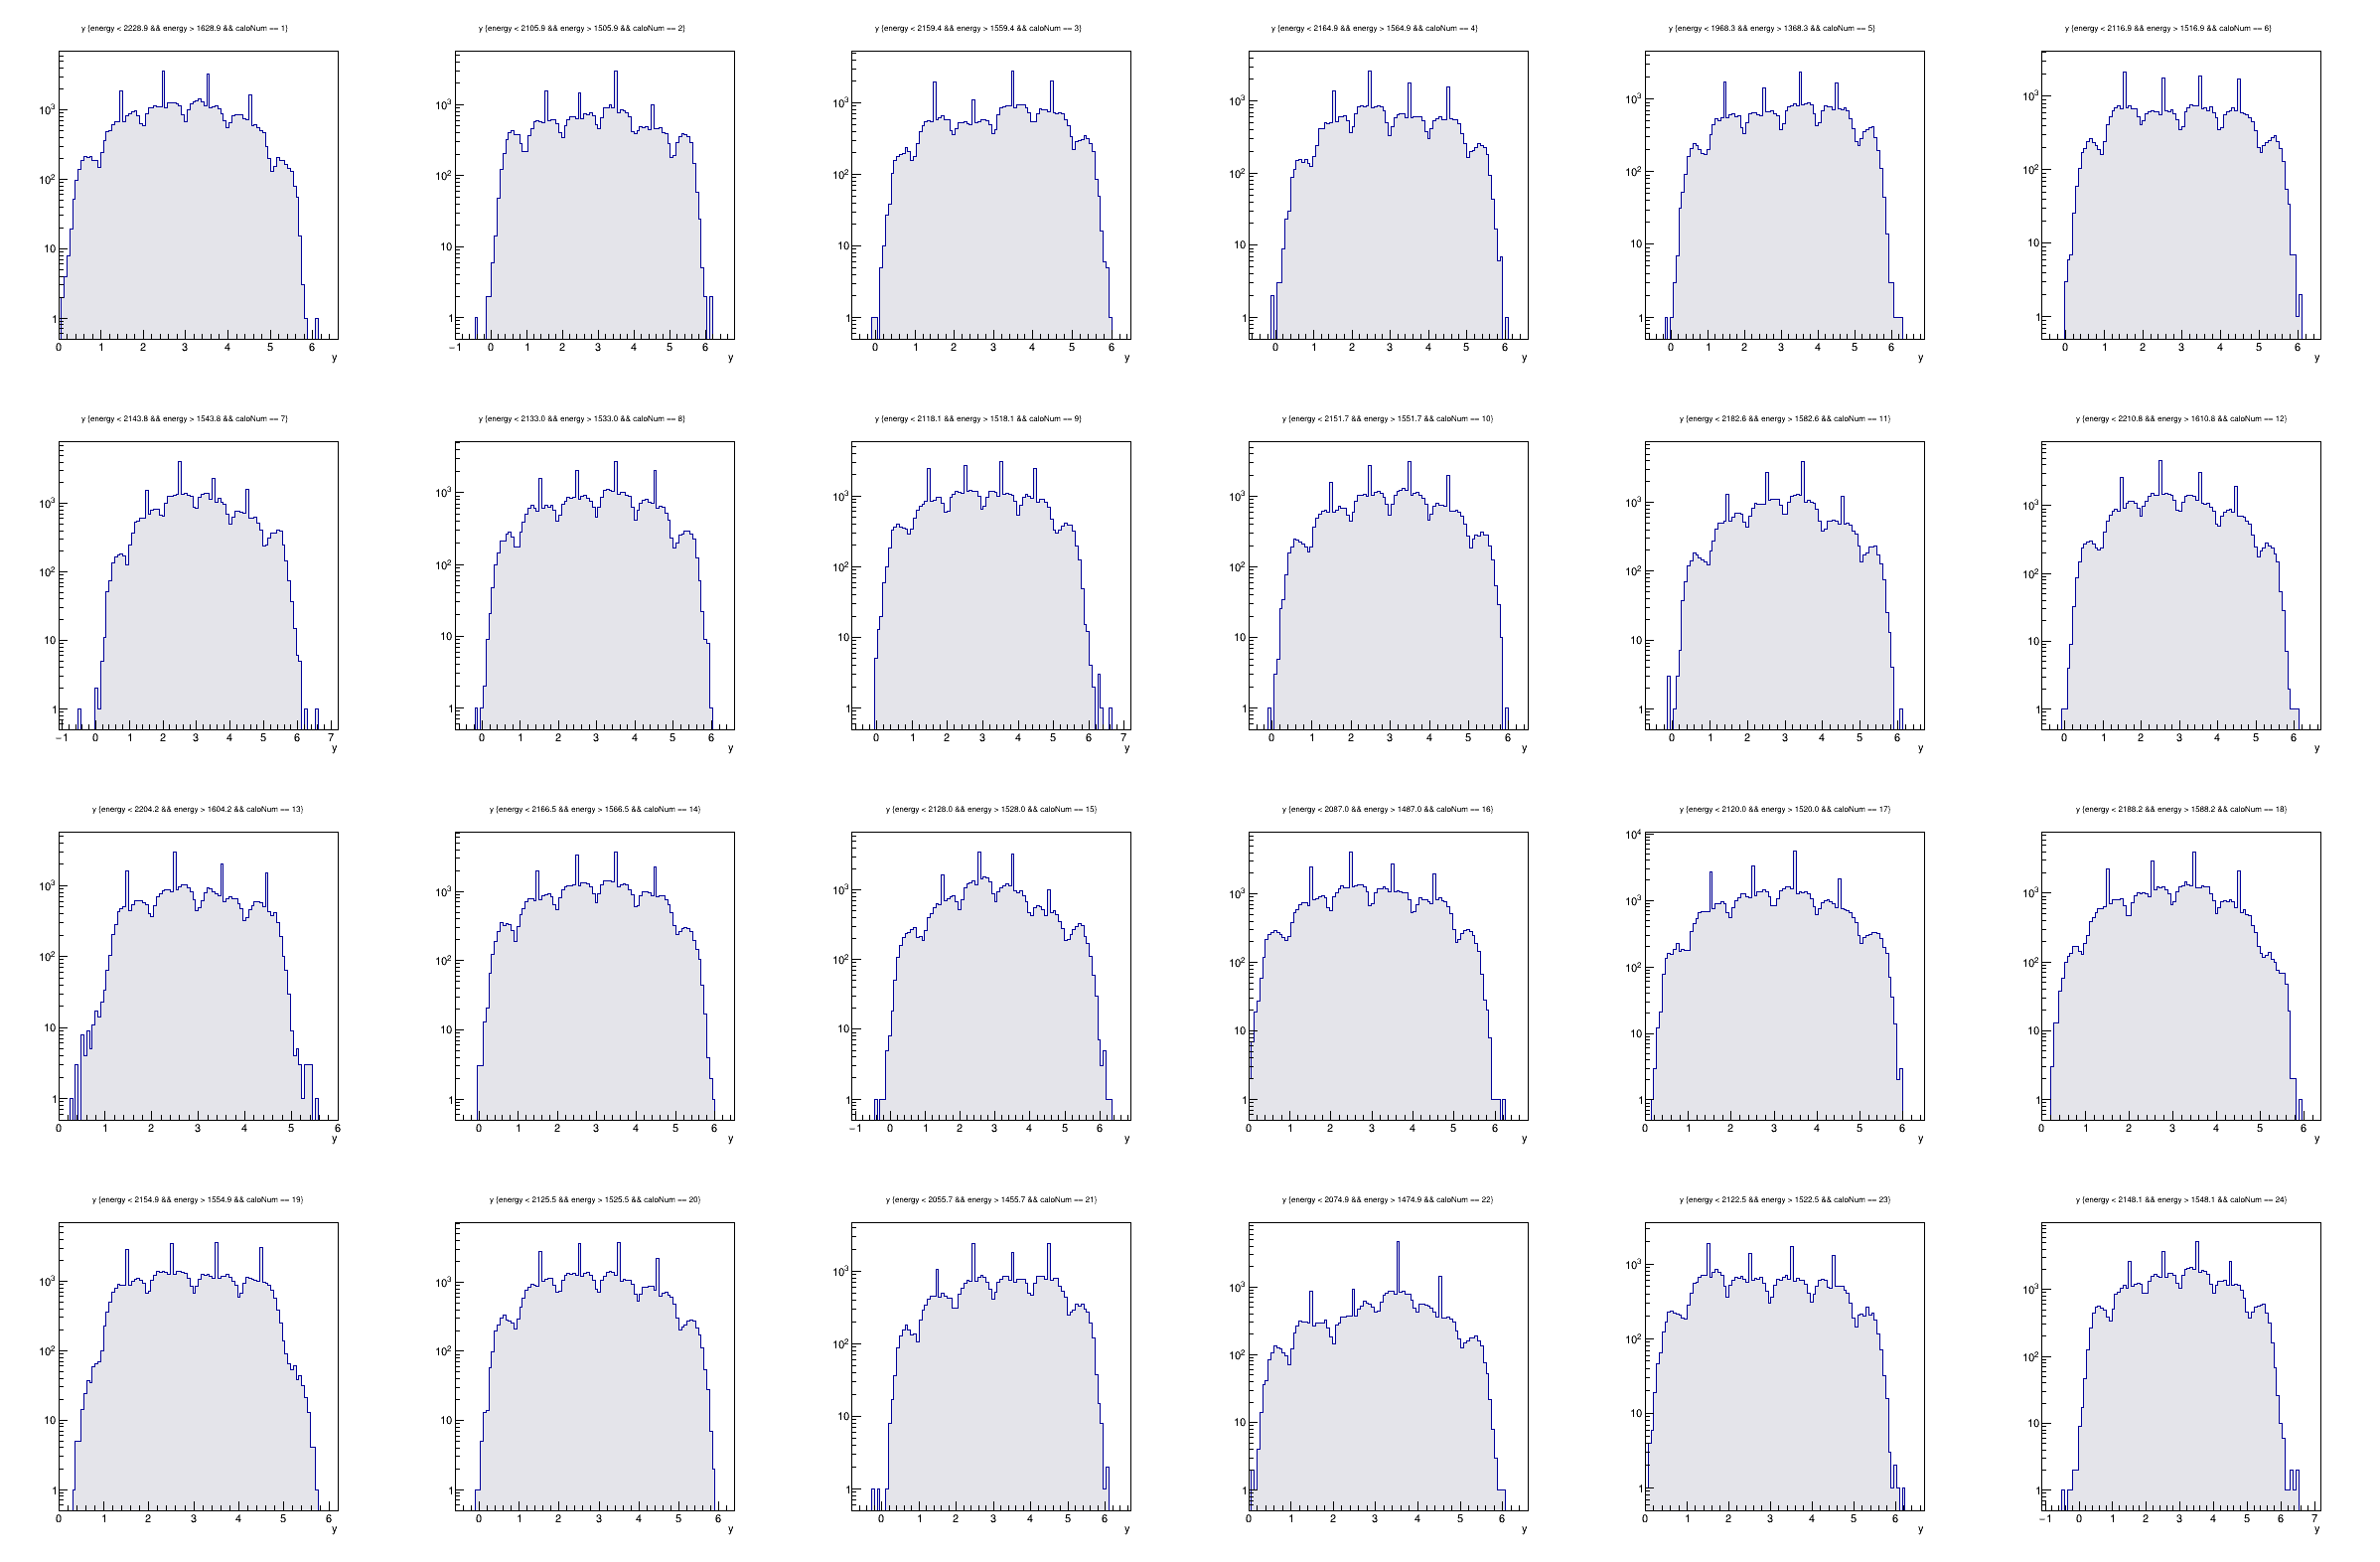

In [73]:
c = r.TCanvas("c","c", 2400, 1600)
c.Divide(6,4)
#energyCut = [2000, 3000]
for i in range(1,25):
    energyCut = [reconEastEnergyConstants[i-1], reconEastEnergyConstants[i-1]+600]
    c.cd(i)
    r.gPad.SetLogy()
    t.Draw("y","energy < "+str(energyCut[1])+" && energy > "+str(energyCut[0])+" && caloNum == "+str(i),"")
c.Draw()

In [ ]:
c = r.TCanvas("c","c", 2400, 1600)
c.Divide(6,4)

energyStep = 100
energyRange = [0,4000]

for i in range(energyRange[0], energyRange[1], energyStep):
    energyCut = [i, i+energyStep]
    print(energyCut)
    for i in range(1,25):
        c.cd(i)
        t.Draw("y","energy < "+str(energyCut[1])+" && energy > "+str(energyCut[0])+" && caloNum == "+str(i),"")
        r.gPad.SetLogy()
    c.Draw()
    c.Print("./images/ReconEastEnergySteps_"+str(energyCut[0]).zfill(5)+"_"+str(energyCut[0])+"_"+str(energyCut[1])+".png")

[0, 100]
[100, 200]
[200, 300]
[300, 400]
[400, 500]
[500, 600]
[600, 700]
[700, 800]
[800, 900]
[900, 1000]
[1000, 1100]
[1100, 1200]
[1200, 1300]
[1300, 1400]
[1400, 1500]
[1500, 1600]
[1600, 1700]
[1700, 1800]
[1800, 1900]
[1900, 2000]
[2000, 2100]
[2100, 2200]
[2200, 2300]
[2300, 2400]
[2400, 2500]
[2500, 2600]
[2600, 2700]
[2700, 2800]
[2800, 2900]
[2900, 3000]
[3000, 3100]


---

In [4]:
f = r.TFile("./data/results_positionsVsTimeVsEnergy_finerBinning_ReconEast_betterBins_9day.root")

In [48]:
fitrange = [1,5]
print(fitrange)

[1, 5]


In [49]:
f1 = r.TF1("f1","gaus", fitrange[0], fitrange[1])
f1.SetParameters(1,1,1)
f1.SetNpx(2000)

In [56]:
#fit function which rejects the regions near crystal centers
#    using TF1::RejectPoint()

def func2(x,p):
    if( x[0] % 1 < 0.52 and x[0] % 1 > 0.48):
        r.TF1.RejectPoint()
        return 0
    else:
        #gaussian: [0]*exp(-0.5*((x-[1])/[2])**2)
        return p[0]*r.TMath.Exp( -0.5*(((x[0]-p[1])/p[2])**2) )
    
f2 = r.TF1("f2", func2, fitrange[0], fitrange[1], 3)
f2.SetParNames("A_{2}", "#bar{x}", "#sigma")
f2.SetParameters(1,1,1)
f2.SetLineColor(2)
f2.SetNpx(2000)

In [57]:
f3 = r.TF1("f3",
#           "[0]*TMath::Sqrt(TMath::Pi() / 2.0)*[1]*( TMath::Erf(([2] + x - 2*[3])/(TMath::Sqrt(2)*[1])) + TMath::Erf(([2] - x + 2*[3])/(TMath::Sqrt(2)*[1])) )", 
           "[0]/2*( TMath::Erf(([2] + x - 2*[3])/(TMath::Sqrt(2)*[1])) + TMath::Erf(([2] - x + 2*[3])/(TMath::Sqrt(2)*[1])) )", 
            fitrange[0], fitrange[1], 4)
f3.SetParameters(1,1,1,1)
f3.SetParNames("A_{3}","#sigma_{gaus}","r_{square}","#bar{x}")
f3.SetNpx(2000)
f3.SetLineColor(3)

In [58]:
#fit function which rejects the regions near crystal centers
#    using TF1::RejectPoint()

def func4(x,p):
    if( x[0] % 1 < 0.52 and x[0] % 1 > 0.48):
        r.TF1.RejectPoint()
        return 0
    else:
        #gaussian: [0]*exp(-0.5*((x-[1])/[2])**2)
        #return p[0]*r.TMath.Exp( -0.5*(((x[0]-p[1])/p[2])**2) )
        return p[0]/2*( r.TMath.Erf((p[2] + x[0] - 2*p[3])/(r.TMath.Sqrt(2)*p[1])) + r.TMath.Erf((p[2] - x[0] + 2*p[3])/(r.TMath.Sqrt(2)*p[1])) )
    
f4 = r.TF1("f2", func4, fitrange[0], fitrange[1], 4)
f4.SetParNames("A_{4}","#sigma_{gaus}","r_{square}","#bar{x}")
f4.SetParameters(1,1,1)
f4.SetLineColor(4)
f4.SetNpx(2000)

In [59]:
xHistName = "xHitPositionsVsTimeVsEnergy"
yHistName = "yHitPositionsVsTimeVsEnergy"

In [60]:
calo = 8
hx = f.Get("farline").Get("calo"+str(calo)).Get(xHistName).Clone()
hy = f.Get("farline").Get("calo"+str(calo)).Get(yHistName).Clone()
hy.GetYaxis().SetTitle("y-position [xtals]")

 FCN=5.52415e+06 FROM MIGRAD    STATUS=CONVERGED     107 CALLS         108 TOTAL
                     EDM=9.41045e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{2}        4.22762e+05   5.18721e+01   3.25278e+00  -4.13798e-06
   2  #bar{x}      3.02466e+00   2.18047e-04  -5.22990e-06   1.47332e+00
   3  #sigma       1.60233e+00   3.24085e-04  -1.58131e-05   5.26351e+00
 FCN=2.41013e+07 FROM MIGRAD    STATUS=CONVERGED     389 CALLS         390 TOTAL
                     EDM=1.25594e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{3}        4.46079e+05   2.34526e+02   4.71332e-02  -6.00098e-06
   2  #sigma_{gaus}   9.47164e-01   1.19962e-03  -1.11514e-07   7.47270e

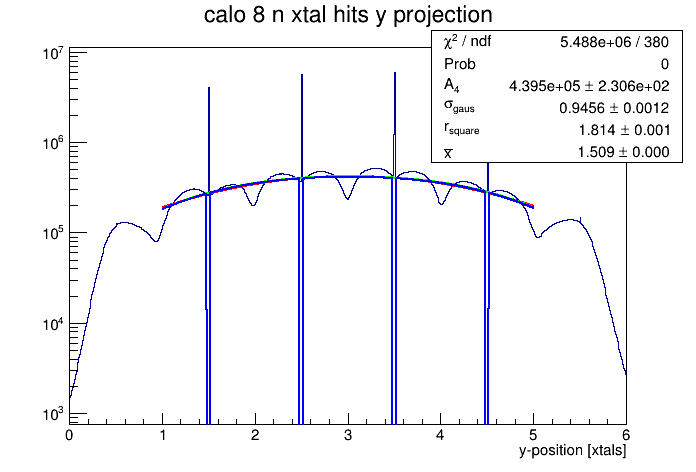

In [62]:
c = r.TCanvas()

hy.GetXaxis().UnZoom()
hy.GetZaxis().UnZoom()
hy.GetZaxis().SetRange(4,7)
hy_y = hy.Project3D("y").Clone()
hy_y.Draw()

f2.SetParameters(10**6,3,1.5)
f3.SetParameters(10**6,4,2,1.5)
f4.SetParameters(10**6,4,2,1.5)

for i in range(2):
    hy_y.Fit(f2,"R")
    hy_y.Fit(f3,"R")
    hy_y.Fit(f4,"R")

hy_y.GetXaxis().SetRangeUser(0,6)

f2.Draw("SAME")
f3.Draw("same")
f4.Draw("same")

c.SetLogy()

c.Draw()